In [3]:
pip install --user tensorflow

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached jax-0.4.6-py3-none-any.whl
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached protobuf-4.22.1-cp38-cp38-win_amd64.whl (420 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.51.3-cp38-cp38-win_amd64.whl (3.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  U

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# Import Dependencies

import numpy as np # For Array processing 
from sklearn.svm import SVC # Classifier
import matplotlib.pyplot as plt # For plotting images
import random # Randomly viewing images
import time # For calculating run times

In [2]:
start = time.time()
from keras.datasets import fashion_mnist # Import Dataset from Keras Package

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data() # Load train and Test Datasets
print(str(time.time()-start)+" Seconds to load the data")

ModuleNotFoundError: No module named 'tensorflow'

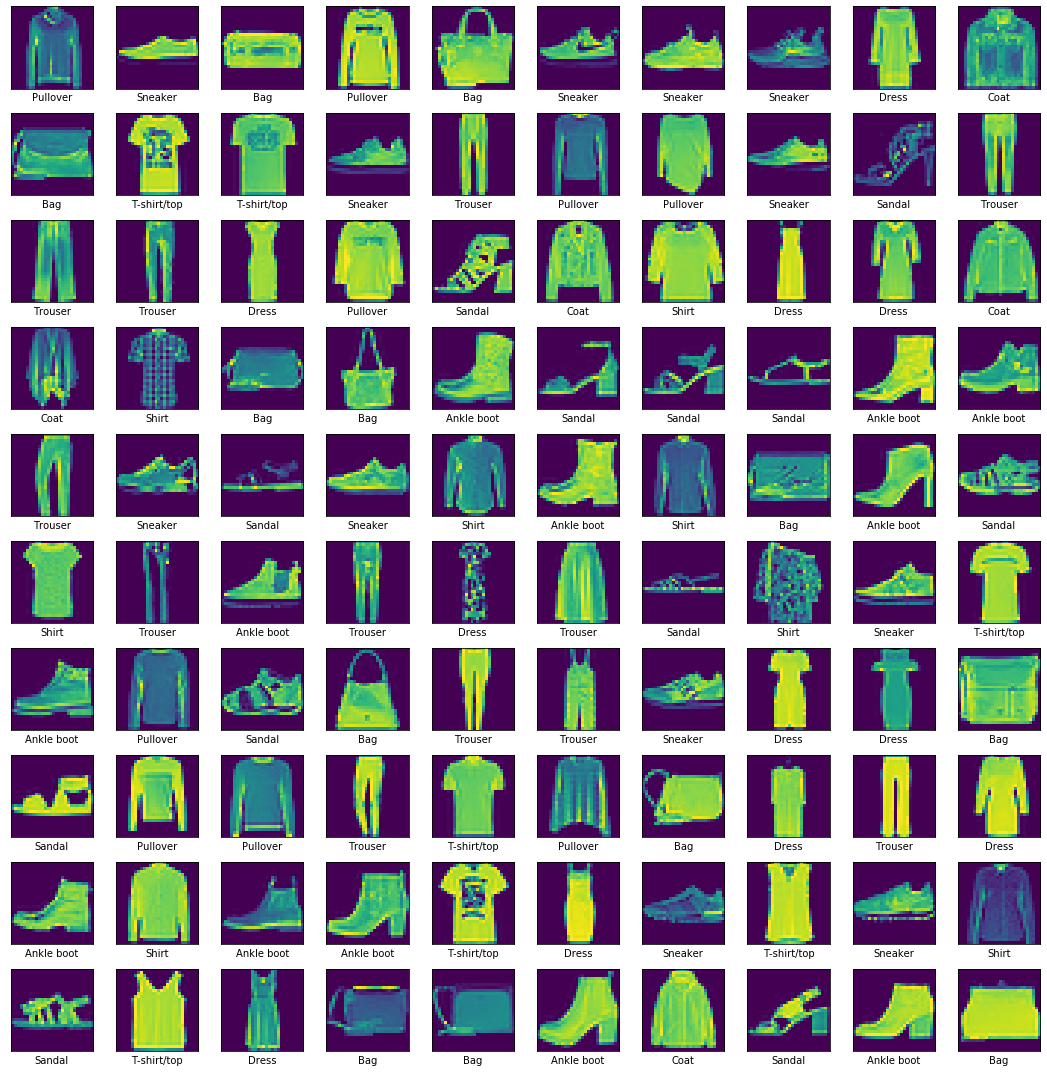

In [6]:
# Randomly sample Images

# Defining Label Names
labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(15, 15)) 
for i in range(10 * 10):
    rand = random.randint(0, len(train_X)+1)
    image = train_X[rand] 
    plt.subplot(10, 10, i+1)       
    plt.imshow(image)  
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[train_Y[rand]])
    plt.tight_layout()   
    
plt.show()

In [14]:
# Image Preprocessing

#Reshape image

train_x = train_X.reshape(train_X.shape[0],train_X.shape[1]*train_X.shape[2])
test_x = test_X.reshape(test_X.shape[0],test_X.shape[1]*test_X.shape[2])
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')

train_x /= 255.0
test_x /= 255.0

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


In [16]:
# SVM Model
start1 = time.time()

svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(train_x, train_Y)

end1 = time.time()
svm_time = end1-start1
print(svm_time)

993.4701280593872


In [ ]:
# Save the model as a pickle object
file = "svm_model.sav"

import pickle

dump(svc, open(file, 'wb'))